In [34]:
import pickle
import cv2
import numpy as np
import torch
import torchvision as tv
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
from loguru import logger
from model.efficientnet.net import EfficientNet
from tokenizers import Tokenizer

from dataset import bms_caption, collator


def draw_boxes(img, boxes):
#     print(img)
    for box in boxes:
        x1, y1, x2, y2 = box
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 1)

In [ ]:
root_dir = "/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation"
train_dir = "/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/train"
labels = "/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/train_labels.csv"

tk_model_file = "./checkpoints/bms_tokenizer.json"
tokenizer = Tokenizer.from_file(tk_model_file)
bbms_coll = collator.EncodedBatchCollator()
bbms = bms_caption.EncodedBBMS(train_dir, labels, tokenizer, mlm=True, img_norm=False)
loader = DataLoader(bbms, batch_size=8, collate_fn=bbms_coll, num_workers=0, shuffle=True)

print(len(bbms))
# print(bbms[1])

In [3]:

for batch_ndx, sample in enumerate(loader):
#     print(sample)
    break

In [4]:
imgkey, img, boxes, ids, type_ids, atten_mask, mask_pos, mask_ids = sample[:8]

In [5]:
print(ids.shape)
print(atten_mask.shape)

torch.Size([8, 138])
torch.Size([8, 222, 222])


uint8 (440, 547, 3)


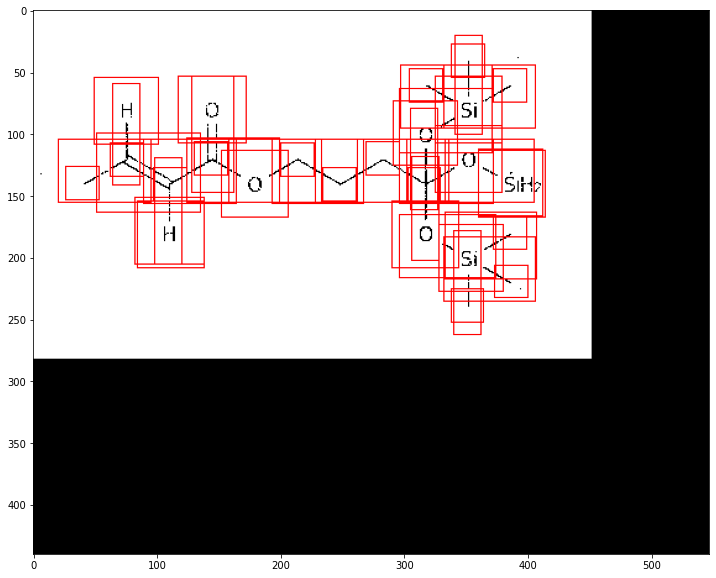

uint8 (440, 547, 3)


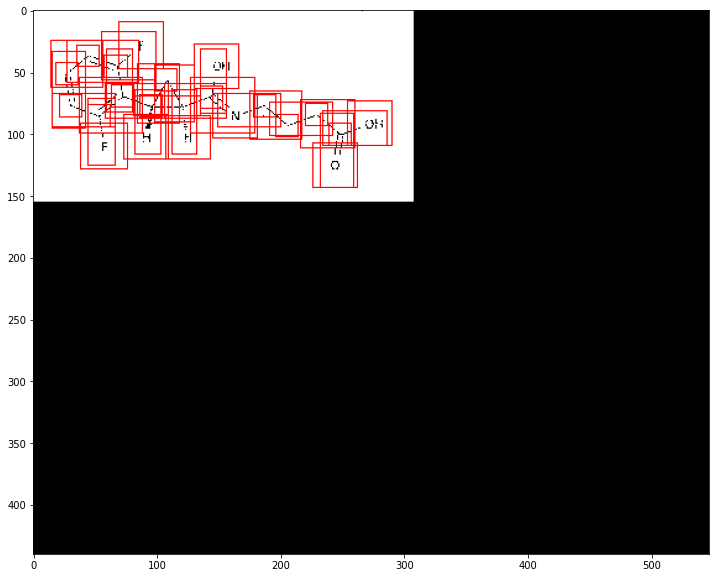

uint8 (440, 547, 3)


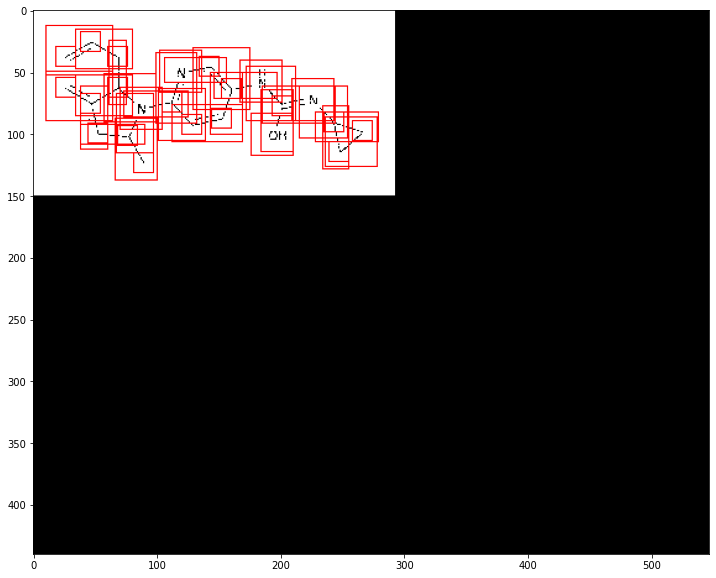

uint8 (440, 547, 3)


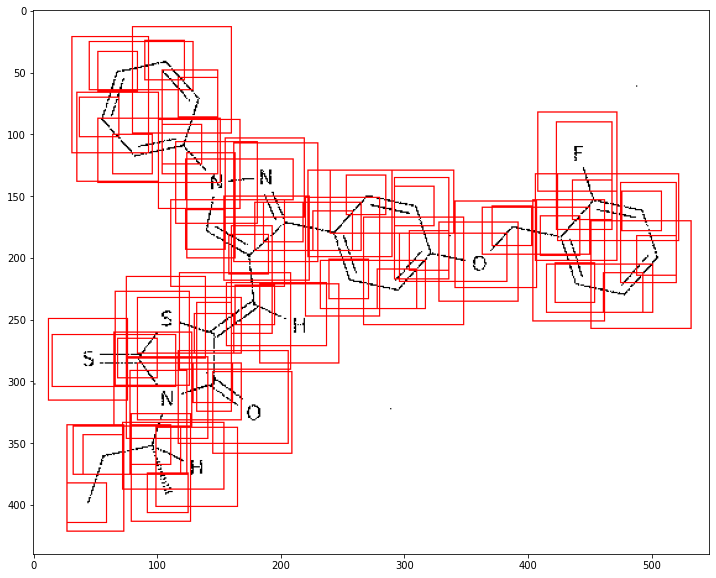

In [33]:
for i in range(4):
    vis_img = img[i].cpu().numpy() * 255
    vis_img = np.transpose(vis_img, [1,2,0]).copy()
    vis_img = vis_img.astype(np.uint8)

    print(vis_img.dtype, vis_img.shape)
    draw_boxes(vis_img, boxes[i])

    plt.figure(figsize=(15, 10))
    plt.imshow(vis_img)
    plt.show()

In [33]:
for i in range(len(ids)):
    print(f"[{i}]" + '-' * 100)
    print(ids.shape)
    print(ids[i])

[0]----------------------------------------------------------------------------------------------------
torch.Size([8, 119])
tensor([  1, 276,  33,  21,  55,  19,  39, 270,  44, 266, 318,  22,  50,  22,
         51,  24,  19,  71,  21,  17, 263,  17, 264,  12, 265,  17, 281,  17,
        262,  17,  25,  17,  23,  17,  22,  17,  24,  17,  26,  17, 262,  13,
        268,  12, 279,  17, 284,  17, 263,  13, 269,  12, 280,  13, 278,  17,
        261,  17,  27,  17,  28,  17, 267,  12, 266,  12, 271,  13,  29,  17,
        261,  13, 283,  17, 270,  12, 272,  13, 277,  19,  76,  22,  17,  29,
         16, 270,  44,  16, 265,  44,  22,  16,  21,  44,  23, 282,  44,  16,
        278,  16, 280,  13,   2,   3,   3,   3,   3,   3,   3,   3,   3,   3,
          3,   3,   3,   3,   3,   3,   3])
[1]----------------------------------------------------------------------------------------------------
torch.Size([8, 119])
tensor([  1, 276,  33,  21,  55,  19,  39, 266,  44, 270,  50,  23,  51,  24,
    

In [34]:
[b.shape for b in boxes]

[torch.Size([40, 4]),
 torch.Size([27, 4]),
 torch.Size([29, 4]),
 torch.Size([20, 4]),
 torch.Size([43, 4]),
 torch.Size([28, 4]),
 torch.Size([28, 4]),
 torch.Size([27, 4])]

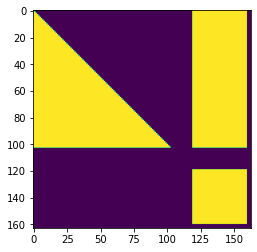

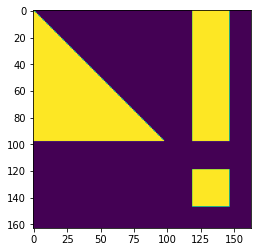

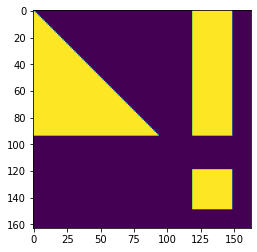

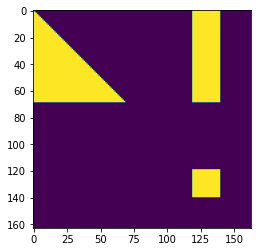

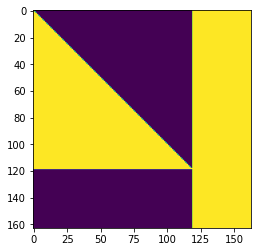

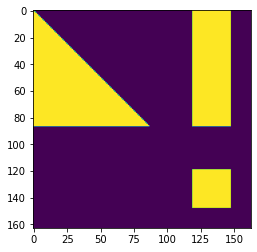

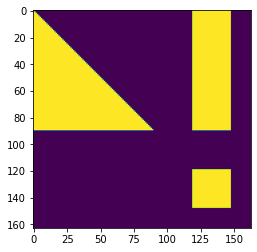

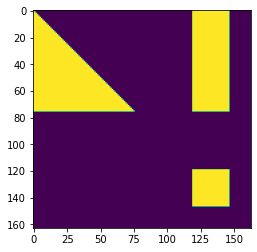

In [37]:
for i in range(len(atten_mask)):
    plt.imshow(atten_mask[i])
    plt.show()

In [39]:
normalize = tv.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [47]:
normalize(torch.ones(3, 10, 10) * 100)

tensor([[[434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633, 434.5633,
          434.5633, 434.5633, 434.5633],
         [434.5633, 434.5633, 43

In [45]:
hash('asdasd121')

6510733927303557075

In [48]:
BMS_CLASSES = [
    '#',
    '-',
    '=',
    'B-1',
    'B0',
    'B1',
    'Br0',
    'Br1',
    'C-1',
    'C0',
    'C1',
    'Cl0',
    'Cl2',
    'Cl3',
    'F0',
    'F1',
    'H',
    'H0',
    'H1',
    'I0',
    'I3',
    'N-1',
    'N0',
    'N1',
    'O-1',
    'O0',
    'O1',
    'P-1',
    'P0',
    'P1',
    'S-1',
    'S0',
    'S1',
    'Si-1',
    'Si0',
    'Si1',
]

In [54]:
BMS_CLASSES[9]

'C0'

In [53]:
len(BMS_CLASSES)

36

In [55]:
vocab = {'(': 0, ')': 1, '+': 2, ',': 3, '-': 4, '/b': 5, '/c': 6, '/h': 7, '/i': 8, '/m': 9, '/s': 10, '/t': 11, '0': 12, '1': 13, '10': 14, '100': 15, '101': 16, '102': 17, '103': 18, '104': 19, '105': 20, '106': 21, '107': 22, '108': 23, '109': 24, '11': 25, '110': 26, '111': 27, '112': 28, '113': 29, '114': 30, '115': 31, '116': 32, '117': 33, '118': 34, '119': 35, '12': 36, '120': 37, '121': 38, '122': 39, '123': 40, '124': 41, '125': 42, '126': 43, '127': 44, '128': 45, '129': 46, '13': 47, '130': 48, '131': 49, '132': 50, '133': 51, '134': 52, '135': 53, '136': 54, '137': 55, '138': 56, '139': 57, '14': 58, '140': 59, '141': 60, '142': 61, '143': 62, '144': 63, '145': 64, '146': 65, '147': 66, '148': 67, '149': 68, '15': 69, '150': 70, '151': 71, '152': 72, '153': 73, '154': 74, '155': 75, '156': 76, '157': 77, '158': 78, '159': 79, '16': 80, '161': 81, '163': 82, '165': 83, '167': 84, '17': 85, '18': 86, '19': 87, '2': 88, '20': 89, '21': 90, '22': 91, '23': 92, '24': 93, '25': 94, '26': 95, '27': 96, '28': 97, '29': 98, '3': 99, '30': 100, '31': 101, '32': 102, '33': 103, '34': 104, '35': 105, '36': 106, '37': 107, '38': 108, '39': 109, '4': 110, '40': 111, '41': 112, '42': 113, '43': 114, '44': 115, '45': 116, '46': 117, '47': 118, '48': 119, '49': 120, '5': 121, '50': 122, '51': 123, '52': 124, '53': 125, '54': 126, '55': 127, '56': 128, '57': 129, '58': 130, '59': 131, '6': 132, '60': 133, '61': 134, '62': 135, '63': 136, '64': 137, '65': 138, '66': 139, '67': 140, '68': 141, '69': 142, '7': 143, '70': 144, '71': 145, '72': 146, '73': 147, '74': 148, '75': 149, '76': 150, '77': 151, '78': 152, '79': 153, '8': 154, '80': 155, '81': 156, '82': 157, '83': 158, '84': 159, '85': 160, '86': 161, '87': 162, '88': 163, '89': 164, '9': 165, '90': 166, '91': 167, '92': 168, '93': 169, '94': 170, '95': 171, '96': 172, '97': 173, '98': 174, '99': 175, 'B': 176, 'Br': 177, 'C': 178, 'Cl': 179, 'D': 180, 'F': 181, 'H': 182, 'I': 183, 'N': 184, 'O': 185, 'P': 186, 'S': 187, 'Si': 188, 'T': 189, '<sos>': 190, '<eos>': 191, '<pad>': 192}

In [56]:
len(vocab)

193

In [57]:
52_000

52000

In [2]:
exrta = pd.read_csv('/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/extra_approved_InChIs.csv')

In [8]:
extra_idx = [f"ex_{i:08}" for i in range(len(exrta))]

In [10]:
f"ex{12:08}"

'ex00000012'

In [11]:
len(exrta)

9998711

In [9]:
exrta['image_id'] = extra_idx

In [10]:
exrta.to_csv("/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/extra_inchis_id.csv")

In [11]:
pd.read_csv("/home/ron/Downloads/bms-molecular-translation/bms-molecular-translation/extra_inchis_id.csv")

,Unnamed: 0,InChI,image_id
0,0,InChI=1S/C13H10Cl4O4/c1-20-13(21-2)11(16)5-6-8...,ex_00000000
1,1,InChI=1S/C23H32O6Si/c1-20(2)25-15-19(27-20)22(...,ex_00000001
2,2,InChI=1S/C24H16N4O3/c29-21-19-20(14-8-2-1-3-9-...,ex_00000002
3,3,InChI=1S/C20H26N2O5/c1-9-14-11-7-13-19(8-21-3)...,ex_00000003
4,4,InChI=1S/C14H12BrN/c15-8-3-1-7(2-4-8)12-9-5-10...,ex_00000004
...,...,...,...
9998706,9998706,"InChI=1S/C21H25NO4S/c1-15-14-18(27(2,24)25)12-...",ex_09998706
9998707,9998707,InChI=1S/C39H42N4O5/c1-5-6-18-40-38(44)27-16-1...,ex_09998707
9998708,9998708,InChI=1S/C19H23ClN2O4S/c1-4-5-6-7-8-26-17-14(2...,ex_09998708
9998709,9998709,InChI=1S/C20H24N2OS/c1-15-8-9-17(24-15)14-22-1...,ex_09998709


In [8]:
320 * 320 * 1.7

174080.0

In [4]:
384 * 384

147456

In [9]:
 320 * 1.7

544.0

In [10]:
544/32

17.0

In [1]:
260/360

0.7222222222222222

In [1]:
[0,1,2,3].index(3)

3

In [35]:
with open('/home/ron/Downloads/bms-molecular-translation/vocabulary_to_int.pkl', 'rb') as f:
    voc2int = pickle.load(f)

In [36]:
voc2int

{'<start>': 0,
 '<end>': 1,
 '<pad>': 2,
 'T': 3,
 ',': 4,
 'c': 5,
 't': 6,
 'I': 7,
 'n': 8,
 'S': 9,
 'H': 10,
 '(': 11,
 'i': 12,
 '3': 13,
 '2': 14,
 'l': 15,
 'O': 16,
 '4': 17,
 '/': 18,
 '1': 19,
 '9': 20,
 '=': 21,
 'h': 22,
 's': 23,
 'b': 24,
 '6': 25,
 'F': 26,
 'N': 27,
 '-': 28,
 '8': 29,
 'm': 30,
 'D': 31,
 '0': 32,
 ')': 33,
 '7': 34,
 '+': 35,
 'P': 36,
 '5': 37,
 'C': 38,
 'B': 39,
 'r': 40}